In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [4]:
df = pd.read_csv('agricultural_yield.csv')
df.head()

,Soil_Quality,Seed_Variety,Fertilizer_Amount_kg_per_hectare,Sunny_Days,Rainfall_mm,Irrigation_Schedule,Yield_kg_per_hectare
0,93.304721,0,132.522218,96.670922,602.386237,3,278.986563
1,83.674653,1,57.283997,99.007556,466.518251,8,836.434840
2,65.963033,1,227.895479,104.844272,510.320495,4,785.881787
3,78.692834,1,176.314126,90.136191,354.350914,5,807.884526
4,72.415684,1,160.070418,101.221668,443.993788,10,1064.542374


In [5]:
df.describe()

,Soil_Quality,Seed_Variety,Fertilizer_Amount_kg_per_hectare,Sunny_Days,Rainfall_mm,Irrigation_Schedule,Yield_kg_per_hectare
count,4000.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,74.924952,0.70375,173.447166,99.841525,502.246625,4.977500,709.167849
std,14.496298,0.45666,72.298671,9.888547,99.222767,2.259816,199.497621
min,50.003622,0.00000,50.062655,66.724469,102.007518,0.000000,108.252421
25%,62.380142,0.00000,108.734463,93.101146,435.810131,3.000000,576.382146
50%,74.630855,1.00000,175.596395,99.762840,502.877959,5.000000,722.532738
75%,87.792071,1.00000,235.200606,106.447769,568.249383,6.000000,847.814106
max,99.998898,1.00000,299.992054,138.520202,876.694217,15.000000,1406.110705


In [6]:
# Example feature selection
X = df[['Soil_Quality', 'Seed_Variety', 'Fertilizer_Amount_kg_per_hectare','Sunny_Days','Rainfall_mm','Irrigation_Schedule']]
y = df['Yield_kg_per_hectare'] # Target variable

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)


In [9]:
model = Sequential([
    Dense(64, activation='relu', input_shape = (X_train.shape[1],)), # Input layer with 64 neurons
    Dense(32, activation='relu'),  # Hidden layer with 32 neurons
    Dense(1)  # Output layer for regression (1 neuron)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mae'])
# MEan squared error and mean absolute error

In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,561 (10.00 KB)

 Trainable params: 2,561 (10.00 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split = 0.2, verbose = 1)

Epoch 1/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 529762.0000 - mae: 699.5996 - val_loss: 558395.0625 - val_mae: 720.5713
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 511580.3438 - mae: 687.8557 - val_loss: 508095.1875 - val_mae: 685.5555
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 458980.1875 - mae: 648.8794 - val_loss: 379137.5312 - val_mae: 588.6219
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 308364.9688 - mae: 527.1027 - val_loss: 193368.5312 - val_mae: 414.3166
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 142411.2812 - mae: 348.4070 - val_loss: 56643.8359 - val_mae: 213.6682
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 38512.5312 - mae: 171.4203 - val_loss: 15218.2549 - val_mae: 101.1860
Epoch 7/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12997.1270 - mae: 92.6652 - val_loss: 9933.1455 - val_mae: 79.3376
Epoch 8/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9664.7451 - mae: 78.7530 - val_loss: 897

In [13]:
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1)
print(f'Test Mean Absolute Error: {test_mae: .2f}')

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2882.6521 - mae: 43.3477 
Test Mean Absolute Error:  41.44


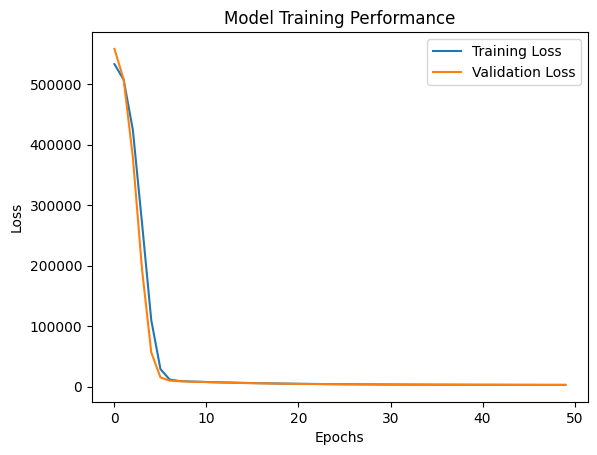

In [16]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Training Performance')
plt.legend()
plt.show()

In [17]:
y_pred = model.predict(X_test)
y_pred

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


array([[ 454.69504],
       [ 672.84186],
       [1083.9778 ],
       [ 663.85144],
       [ 815.0144 ],
       [1000.65894],
       [ 319.7396 ],
       [ 577.0763 ],
       [ 441.37137],
       [ 791.77075],
       [ 618.33875],
       [ 671.5967 ],
       [ 636.09674],
       [ 725.25085],
       [ 834.52905],
       [ 672.4702 ],
       [ 963.6627 ],
       [ 472.63724],
       [ 574.8663 ],
       [ 361.5414 ],
       [ 777.485  ],
       [ 805.1593 ],
       [ 381.40378],
       [ 817.8604 ],
       [1015.3728 ],
       [ 592.0232 ],
       [ 656.78894],
       [ 975.6315 ],
       [ 610.28503],
       [ 619.5371 ],
       [ 675.6849 ],
       [ 798.6247 ],
       [ 825.1029 ],
       [ 788.8956 ],
       [ 525.42004],
       [ 722.09436],
       [ 702.63245],
       [1021.3212 ],
       [ 251.07281],
       [ 649.51404],
       [ 927.0394 ],
       [ 893.42993],
       [ 759.35614],
       [ 768.65515],
       [ 627.0585 ],
       [ 835.572  ],
       [ 623.7919 ],
       [ 589.

In [18]:
from sklearn.metrics import mean_absolute_error


In [19]:
# Assuming y_test is your true labels and y_pred is your predicted labels
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")


Mean Absolute Error: 41.44352793597169


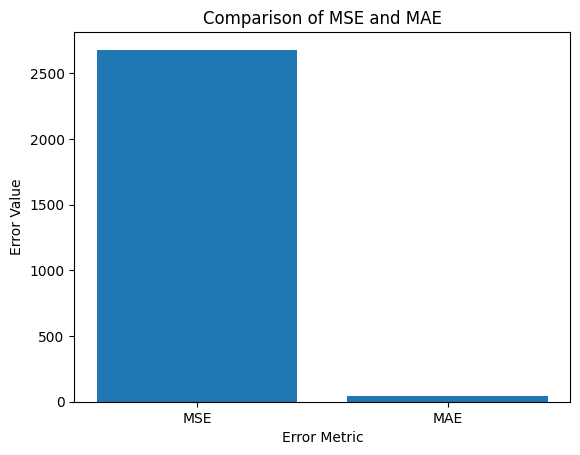

In [20]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Assuming y_test is your true labels and y_pred is your predicted labels
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Plotting the errors
errors = {'MSE': mse, 'MAE': mae}
plt.bar(errors.keys(), errors.values())
plt.xlabel('Error Metric')
plt.ylabel('Error Value')
plt.title('Comparison of MSE and MAE')
plt.show()


<ipython-input-21-5fd242838210>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test, label='Actual Yield')
<ipython-input-21-5fd242838210>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label='Predicted Yield')


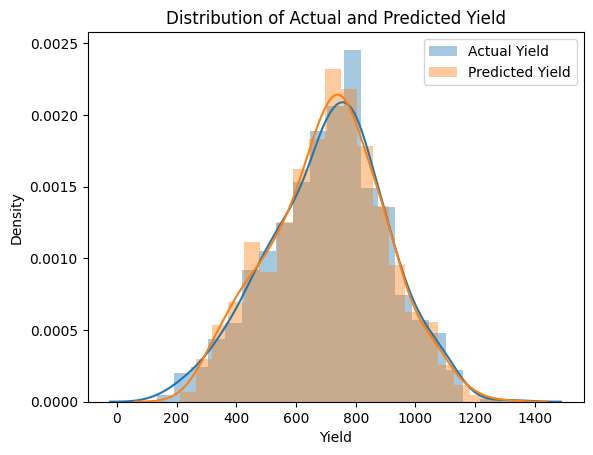

In [21]:
import seaborn as sns

# Distribution plots
sns.distplot(y_test, label='Actual Yield')
sns.distplot(y_pred, label='Predicted Yield')
plt.xlabel("Yield")
plt.ylabel("Density")
plt.title("Distribution of Actual and Predicted Yield")
plt.legend()
plt.show()